In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from collections import defaultdict
from num2words import num2words
from nltk.tokenize import word_tokenize 
import collections
from sklearn.model_selection import train_test_split

import seaborn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD


In [2]:
#converting traning.csv to dataframe
datatrain=pd.read_csv(r"C:\Users\Ashwani Sharma\Desktop\Era\IIIT DELHI\SEM2\IR\project\train.csv")

In [3]:
datatrain

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
#filling NaN with none for keyword  and unknown for location
datatrain.location.fillna("unknown",inplace=True)
datatrain.keyword.fillna("none",inplace=True)
datatrain

,id,keyword,location,text,target
0,1,none,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,none,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,none,unknown,All residents asked to 'shelter in place' are ...,1
3,6,none,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,none,unknown,Just got sent this photo from Ruby #Alaska as ...,1
5,8,none,unknown,#RockyFire Update => California Hwy. 20 closed...,1
6,10,none,unknown,#flood #disaster Heavy rain causes flash flood...,1
7,13,none,unknown,I'm on top of the hill and I can see a fire in...,1
8,14,none,unknown,There's an emergency evacuation happening now ...,1
9,15,none,unknown,I'm afraid that the tornado is coming to our a...,1


In [5]:
#preprocessing training documents and creating [document][term] vocabulary named "vocab"
idSent=datatrain[['id','text']]
vocab=defaultdict(list)
num=0
tokens=defaultdict(list)
freq=0
sentence=[]
new_train=pd.DataFrame(columns=["id",'processed_text'])
portstem=PorterStemmer()
tweets=[]
for ID in idSent['id']:
    vocab[ID]={}
    words=[]
         
    while(num!=len(datatrain)):
        stopw = set(stopwords.words('english'))
           
        vocabwords=nltk.tokenize.word_tokenize((idSent['text'][num]).lower())
        
        #print(vocabwords)
        for w in vocabwords:
            w=w.strip("=")
            w=w.strip("'")
            w=w.strip('"')
            w=w.strip(".")
            w=w.strip(":")
            w=w.strip(";")
            w=w.strip("*")
            w=w.strip('')
           
            w=portstem.stem(w)
            if(w.isdigit()):
                w=num2words(w)
            
            
            if w not in string.punctuation and w not in stopw:
                
                if w not in tokens and w not in vocab[ID] :
                    
                    vocab[ID][w]=1
                    tokens[w]=1
                    #print("1")
                    #print(vocab[ID])
                elif w in tokens:
                    tokens[w]=tokens[w]+1
                    if w not in vocab[ID]:
                        #print("2")
                        vocab[ID][w]=1
                        
                        #print(vocab[ID])    
                    elif w in vocab[ID]:
                        #print("3")
                        vocab[ID][w]=1+vocab[ID][w]
                    #print(vocab[ID])
            #print("4")
            #print(vocab[ID])
            
                words.append(w)
                
        new_train=new_train.append({'id':ID,'processed_text':words},ignore_index=True) 
        sentence.append(words)
            
           
              
        #print(words)    
        
        break
    
    num=num+1
    
for i in sentence:
    tweet=''
    for word in i:
        tweet=tweet+word
        tweet=tweet+' '
        
    tweets.append(tweet) 
#print(new_train)
#print(tweets)
print(vocab)



defaultdict(<class 'list'>, {1: {'deed': 1, 'reason': 1, 'thi': 1, 'earthquak': 1, 'may': 1, 'allah': 1, 'forgiv': 1, 'us': 1}, 4: {'forest': 1, 'fire': 1, 'near': 1, 'la': 1, 'rong': 1, 'sask': 1, 'canada': 1}, 5: {'resid': 1, 'ask': 1, 'shelter': 2, 'place': 2, 'notifi': 1, 'offic': 1, 'evacu': 1, 'order': 1, 'expect': 1}, 6: {'13,000': 1, 'peopl': 1, 'receiv': 1, 'wildfir': 1, 'evacu': 1, 'order': 1, 'california': 1}, 7: {'got': 1, 'sent': 1, 'thi': 1, 'photo': 1, 'rubi': 1, 'alaska': 1, 'smoke': 1, 'wildfir': 1, 'pour': 1, 'school': 1}, 8: {'rockyfir': 1, 'updat': 1, 'california': 1, 'hwi': 1, 'twenty': 1, 'close': 1, 'direct': 1, 'due': 1, 'lake': 1, 'counti': 1, 'fire': 1, 'cafir': 1, 'wildfir': 1}, 10: {'flood': 2, 'disast': 1, 'heavi': 1, 'rain': 1, 'caus': 1, 'flash': 1, 'street': 1, 'manit': 1, 'colorado': 1, 'spring': 1, 'area': 1}, 13: {'top': 1, 'hill': 1, 'see': 1, 'fire': 1, 'wood': 1}, 14: {'emerg': 1, 'evacu': 1, 'happen': 1, 'build': 1, 'across': 1, 'street': 1}, 15: 

In [7]:
#frequency of unique words in training corpus
print(tokens)

defaultdict(<class 'list'>, {'deed': 2, 'reason': 31, 'thi': 481, 'earthquak': 52, 'may': 88, 'allah': 9, 'forgiv': 3, 'us': 123, 'forest': 66, 'fire': 358, 'near': 56, 'la': 24, 'rong': 1, 'sask': 1, 'canada': 13, 'resid': 9, 'ask': 28, 'shelter': 6, 'place': 35, 'notifi': 1, 'offic': 51, 'evacu': 130, 'order': 38, 'expect': 32, '13,000': 1, 'peopl': 201, 'receiv': 4, 'wildfir': 81, 'california': 121, 'got': 124, 'sent': 13, 'photo': 66, 'rubi': 1, 'alaska': 7, 'smoke': 54, 'pour': 4, 'school': 70, 'rockyfir': 4, 'updat': 56, 'hwi': 9, 'twenty': 19, 'close': 38, 'direct': 18, 'due': 31, 'lake': 16, 'counti': 38, 'cafir': 2, 'flood': 168, 'disast': 157, 'heavi': 20, 'rain': 58, 'caus': 104, 'flash': 21, 'street': 32, 'manit': 1, 'colorado': 16, 'spring': 18, 'area': 48, 'top': 56, 'hill': 12, 'see': 128, 'wood': 6, 'emerg': 163, 'happen': 55, 'build': 152, 'across': 20, 'afraid': 5, 'tornado': 38, 'come': 125, 'three': 134, 'die': 79, 'heat': 47, 'wave': 74, 'far': 28, 'haha': 20, 'sou

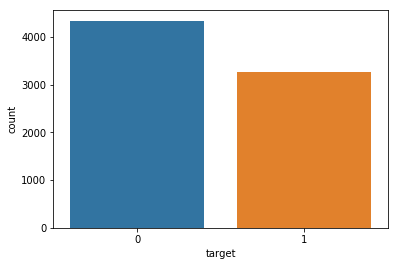

In [9]:
#visual reprsentation of distribution of target values
seaborn.countplot(data =datatrain, x = "target")

In [6]:
#creating tfidf [term][document] inverted index
def tfidf_vocab2(token,idsent,vocab1):
    vocab2=defaultdict(dict)
    for term in token:

        c=0
        for ID in idsent['id']:

            if term in vocab1[ID]:
                c=c+1
        df=c
    
   
        for ID in idsent['id']:
            #print(term)
            #print(ID)

            vocab2[term][ID]=0
            if term in vocab1[ID]:
                tf=vocab1[ID][term]
                tf=math.log((1+tf),10)
                idf=math.log((len(idsent)/df),10)
                tfidf=tf*idf
                vocab2[term][ID]=tfidf

  
    return vocab2


In [7]:
#calling vocab2 function for training data
vocab2=tfidf_vocab2(tokens,idSent,vocab)

In [8]:
# creating [doc][term] tfidf matrix
def matrix(token,vocab1,Vocab2):
    
    docmatrix=np.zeros(shape=(len(vocab1),len(token)))


    print(len(vocab1))
    print(len(token))
    i=0
    j=0
    for doc_i in vocab1:
        j=0
        for term_j in token:


            if term_j in vocab1[doc_i]:

                docmatrix[i][j]=Vocab2[term_j][doc_i]

            else:
                docmatrix[i][j]=0



            j=j+1
            if(j==len(token)):
                break
        i=i+1
        if(i==len(vocab1)):
            break

    print(docmatrix)
    return docmatrix



In [ ]:
#================LATENT SEMANTIC ANALYSIS============================#

In [15]:
#stemmed document list
doc_list=[]
for i in new_train["processed_text"]:
    doc_list.append(i)

In [14]:
#seperating [doc term] matrix into target 1 entries as topic 1 and target0 entries as topic 0
topic1=np.zeros(shape=(len(vocab),len(tokens)))
topic0=np.zeros(shape=(len(vocab),len(tokens)))
i=0
j=0
for doc_i in vocab:
    if doc_i==len(vocab):
        break
    
    if datatrain.iloc[int(doc_i)]["target"]==1:
        for j in range(len(tokens)):
       
            topic1[i][j]=X[i][j]
           
            j=j+1
    else:
        for j in range(len(tokens)):
            topic0[i][j]=X[i][j]
            
            j=j+1
    
    i=i+1
   

In [16]:
# extracting words that will represent 2 topics
model_svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=90, random_state=100)
model_svd.fit(topic0)
topic_terms={}

j=0
for i, comp in enumerate(model_svd.components_):
    topic_terms[i]=[]
    terms = zip(tokens, comp)
    sortedterms = sorted(terms, key= lambda x:x[1], reverse=True)[:1000]
    for t in sortedterms:
        topic_terms[i].append(t)


if(j==1):
    topic_disas={}
    topic_disas=topic_terms
    
else:
    topic_ndisas={}

    topic_ndisas=topic_terms
    
    

In [17]:
#2 topics extracted
print(topic_ndisas)
print("\n")
print(topic_disas)
print("\n")


{0: [('http', 0.2279027255240491), ('amp', 0.17539019024053526), ('fire', 0.15139930297549836), ('famili', 0.14811553353866008), ('legionnair', 0.14779282252440495), ('two', 0.13578945765928505), ('thi', 0.13432472403194742), ('attack', 0.13327837102298423), ('fatal', 0.130729063758535), ("n't", 0.12687822487196687), ('wa', 0.12502158014209408), ('via', 0.1170292070595798), ('derail', 0.11041678450166234), ('outbreak', 0.10830655972439783), ('like', 0.1080654269059673), ('one', 0.1005185619965314), ('sue', 0.09614437967946829), ('forty', 0.09347078837565335), ('affect', 0.09115612901904074), ('wave', 0.08885172102719195), ('get', 0.08810024116646632), ('flood', 0.08754981107311144), ('bioterror', 0.0833744505335673), ('burn', 0.08026405330263452), ('disea', 0.07834485275642233), ('train', 0.07620121875892046), ('muslim', 0.07596613266633258), ('news', 0.07559978087408649), ('templ', 0.0754975887013727), ('flag', 0.07513627540240868), ('geller', 0.07502450095025995), ('pamela', 0.074247

In [18]:
#classifying docs on the basis of adition of similarity scores of words matched in train document and topic words
# topic 0=disastrous topic 1=non disastrous
def Classification(vocab,topic_terms):
    classification={}
    cal=defaultdict(dict)
    for doc in vocab:
        for topic in topic_terms:
            cal[doc][topic]=0
            for word in vocab[doc]:
                for term in range(len(topic_terms[topic])):
                    if word==topic_terms[topic][term][0]:
                        cal[doc][topic]=cal[doc][topic]+topic_terms[topic][term][1]

        cal[doc]=collections.OrderedDict(sorted(cal[doc].items(),reverse=True,key=lambda x: x[1]))

        for k,v in cal[doc].items():

            classification[doc]=k
            break
    return classification,cal

In [19]:

# finding accuracy and confusion matrix
def ACCURACY(Y,classification):
   
    actual_classification=[]
    precdicted_classification=[]
    for i in Y:
        actual_classification.append(i)
    for i in classification:
        if classification[i]==1:
            precdicted_classification.append(0)
        else:
            precdicted_classification.append(1)

    conf_matrix=confusion_matrix(actual_classification, precdicted_classification)
    accuracy=accuracy_score(actual_classification, precdicted_classification)
    print(conf_matrix)
    print(accuracy)

In [61]:
# printing topic words

topic_terms={}
topic_terms[0]=topic_ndisas[1]
print("topic_disasasterous",topic_terms[0])

print("\n")
topic_terms[1]=topic_disas[0]
print("topic_non disasastereous",topic_terms[1])
print(len(topic_terms[0]))
print(len(topic_terms[1]))
print("\n"+"predicting ")
classification_train,cal_train=Classification(vocab,topic_terms)
print("\n"+"accuracy")
ACCURACY(Y,classification_train)

topic_disasasterous [('legionnair', 0.447612741471245), ('famili', 0.386605194723109), ('outbreak', 0.31514374359093456), ('sue', 0.29447030053899975), ('forty', 0.2819840010754396), ('affect', 0.2735746485970487), ('fatal', 0.26066519742000893), ('disea', 0.24830307974609206), ('diseas', 0.06123715340658199), ('edinburgh', 0.030325244051035444), ('legio', 0.028021136186712776), ('//t.co/02elqlopfk', 0.024686272255971323), ('//t.co/8lcbdw7m2z', 0.024686272255971323), ('//t.co/2mwc9ywjzi', 0.024686272255971323), ('//t.co/81hvv3n3r', 0.024686272255971323), ('//t.co/2ao97o2a9d', 0.024686272255971323), ('//t.co/3snyoohseq', 0.024686272255971323), ('//t.co/vbsj8tniv1', 0.024686272255971323), ('//t.co/so81ab3a1x', 0.024686272255971323), ('//t.co/ojyw7jkuh5', 0.024686272255971323), ('//t.co/rv9dv6joew', 0.024686272255971323), ('//t.co/1h7zk6uyz', 0.024686272255971323), ('//t.co/mnsy1qr7bq', 0.024686272255971323), ('//t.co/kkdx8zmv4g', 0.024686272255971323), ('//t.co/13w8cyukkz', 0.02468627225


accuracy
[[4158  184]
 [3074  197]]
0.5720478129515303


In [ ]:
#================= test.csv ============================

In [20]:
#converting test.csv to dataframe
datatest=pd.read_csv(r"C:\Users\Ashwani Sharma\Desktop\Era\IIIT DELHI\SEM2\IR\project\test.csv")
datatest

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [21]:
#filling NaN with none for keyword  and unknown for location
datatest.location.fillna("unknown",inplace=True)
datatest.keyword.fillna("none",inplace=True)
datatest

,id,keyword,location,text
0,0,none,unknown,Just happened a terrible car crash
1,2,none,unknown,"Heard about #earthquake is different cities, s..."
2,3,none,unknown,"there is a forest fire at spot pond, geese are..."
3,9,none,unknown,Apocalypse lighting. #Spokane #wildfires
4,11,none,unknown,Typhoon Soudelor kills 28 in China and Taiwan
5,12,none,unknown,We're shaking...It's an earthquake
6,21,none,unknown,They'd probably still show more life than Arse...
7,22,none,unknown,Hey! How are you?
8,27,none,unknown,What a nice hat?
9,29,none,unknown,Fuck off!


In [22]:
#preprocessing test documents and creating [document][term] vocabulary named "vocab_test"
idSent_test=datatest[['id','text']]
vocab_test=defaultdict(list)
num=0
tokens_test=defaultdict(list)
freq=0
sentence=[]
new_test=pd.DataFrame(columns=["id",'processed_text'])
portstem=PorterStemmer()
tweets_test=[]
for ID in idSent_test['id']:
    vocab_test[ID]={}
    words=[]
         
    while(num!=len(datatest)):
        stopw = set(stopwords.words('english'))
           
        vocabwords=nltk.tokenize.word_tokenize((idSent_test['text'][num]).lower())
        
        #print(vocabwords)
        for w in vocabwords:
            w=w.strip("=")
            w=w.strip("'")
            w=w.strip('"')
            w=w.strip(".")
            w=w.strip(":")
            w=w.strip(";")
            w=w.strip("*")
            w=w.strip('')
           
            w=portstem.stem(w)
            if(w.isdigit()):
                w=num2words(w)
            
            
            if w not in string.punctuation and w not in stopw:
                
                if w not in tokens_test and w not in vocab_test[ID] :
                    
                    vocab_test[ID][w]=1
                    tokens_test[w]=1
                    #print("1")
                    #print(vocab[ID])
                elif w in tokens_test:
                    tokens_test[w]=tokens_test[w]+1
                    if w not in vocab_test[ID]:
                        #print("2")
                        vocab_test[ID][w]=1
                        
                        #print(vocab[ID])    
                    elif w in vocab_test[ID]:
                        #print("3")
                        vocab_test[ID][w]=1+vocab_test[ID][w]
                    #print(vocab[ID])
            #print("4")
            #print(vocab[ID])
            
                words.append(w)
                
        new_test=new_test.append({'id':ID,'processed_text':words},ignore_index=True) 
        sentence.append(words)
            
           
              
        #print(words)    
        
        break
    
    num=num+1
    
for i in sentence:
    tweet_test=''
    for word in i:
        tweet_test=tweet_test+word
        tweet_test=tweet_test+' '
        
    tweets_test.append(tweet_test) 
#print(new_train)
#print(tweets)
print(vocab_test)



defaultdict(<class 'list'>, {0: {'happen': 1, 'terribl': 1, 'car': 1, 'crash': 1}, 2: {'heard': 1, 'earthquak': 1, 'differ': 1, 'citi': 1, 'stay': 1, 'safe': 1, 'everyon': 1}, 3: {'forest': 1, 'fire': 1, 'spot': 1, 'pond': 1, 'gees': 1, 'flee': 1, 'across': 1, 'street': 1, 'save': 1}, 9: {'apocalyps': 1, 'light': 1, 'spokan': 1, 'wildfir': 1}, 11: {'typhoon': 1, 'soudelor': 1, 'kill': 1, 'twenty-eight': 1, 'china': 1, 'taiwan': 1}, 12: {'shake': 1, 'earthquak': 1}, 21: {'probabl': 1, 'still': 1, 'show': 1, 'life': 1, 'arsen': 1, 'yesterday': 1, 'eh': 2}, 22: {'hey': 1}, 27: {'nice': 1, 'hat': 1}, 29: {'fuck': 1}, 30: {"n't": 1, 'like': 1, 'cold': 1}, 35: {'nooooooooo': 1, "n't": 1}, 42: {"n't": 1, 'tell': 1}, 43: {}, 45: {'awesom': 1}, 46: {'birmingham': 2, 'wholesal': 2, 'market': 2, 'ablaz': 1, 'bbc': 1, 'news': 1, 'fire': 1, 'break': 1, 'http': 1, '//t.co/irwqcezweu': 1}, 47: {'sunkxssedharri': 1, 'wear': 1, 'short': 1, 'race': 1, 'ablaz': 1}, 51: {'previouslyondoyintv': 1, 'toke': 

In [29]:
#prediction of test.csv lsa
classification_test,cal_test=Classification(vocab_test,topic_terms)
precdicted_classification=[]
for i in classification_test:
    if classification_test[i]==1:
        precdicted_classification.append(0)
    else:
        precdicted_classification.append(1)
        
c1=pd.Series(idSent_test['id'])
test_result=pd.DataFrame(c1)
pred=pd.Series(precdicted_classification)
test_result=pd.concat([test_result,pred], axis = 1)
test_result.columns=["ID","target"]
test_result.to_csv(r'C:\Users\Ashwani Sharma\Desktop\Era\IIIT DELHI\SEM2\IR\project\MT19121_test_result_IR_LSA.csv', index = False)
 

In [61]:
#saving similarity scores
with open("train_dict.json","w") as file:
    file.write(json.dumps(cal))
with open("test_dict.json","w") as file:
    file.write(json.dumps(cal_test))